# **EDA**

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/FSDS_Job_Gurantee/Live Class/25_SEP_2022_EDA/student_performance/student_performance/data/student.csv')

**Top 5 rows**

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Below 5 rows**

In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### Seprating Categorical and Numerical Columns
**Categorical**:
* Nominal
    * gender
    * race/ethnicity
    * lunch
    * test preparation course
* Odinal
    * parental level of education

**Numerical**:
* Continuous
    * math score
    * reading score
    * writing score
* Discrete
    * No column

**Shape of the data**

In [5]:
data.shape

(1000, 8)

**Basic information about the data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking data types of gender

In [7]:
data['gender'].dtypes

dtype('O')

In [8]:
data['gender'].dtypes == 'O'

True

**Columns List**

In [9]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Segregting Categorical Columns

In [10]:
categorical_columns = [feature for feature in data.columns if data[feature].dtypes == 'O']

### Segregting Numerical Columns

In [11]:
numerical_columns = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [12]:
data[categorical_columns]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [13]:
data[numerical_columns]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


### Memory Usage

In [14]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

### Missing Value

In [15]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.duplicated().sum()

0

### Unique value in each column

In [18]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

**Unique value in a column**

In [19]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

### Statistical Analysis

**T is for Transpose and describe will show all the statistical measures**

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**Correlartion**

In [21]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**Conclusion:**

* High '+ve' correlatiob between math and reading score. It means if you are a good reader then you are good in math as well.

**Covariance**

In [22]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


**Skewness**

In [23]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

### Graphical Analysis

**distplot** : 
distribution plot

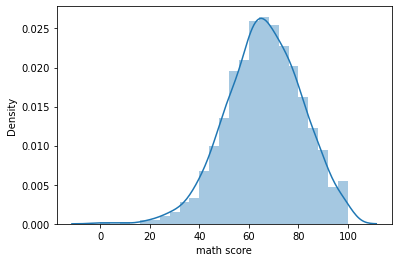

In [24]:
sns.distplot(data['math score'])

**Conclusion:**
* Left skewed graph

### Soms Business Analysis

In [25]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Average score for all subject**

In [26]:
data['Average Score']=(data['math score']+data['reading score']+data['writing score'])/3

In [27]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


**Gender wise mean value for numerical column**

In [28]:
data.groupby('gender').mean()

,math score,reading score,writing score,Average Score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


**Gender wise count for all the column**

In [29]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


**Que. Find out no of student whoever is having less than 30 marks in math?**

In [30]:
data[data['math score'] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Average Score                  14
dtype: int64

### Normailty check for numerical column

In [31]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average Score'],
      dtype='object')

In [32]:
numerical_data = data[numerical_columns]

In [33]:
numerical_data.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [34]:
from scipy.stats import normaltest

In [35]:
p_value = normaltest(numerical_data['math score'])[1]*100

In [36]:
if p_value > 0.05:
  print(" Data is normally distributed")
else:
  print("Data is not nomally distributed")

Data is not nomally distributed


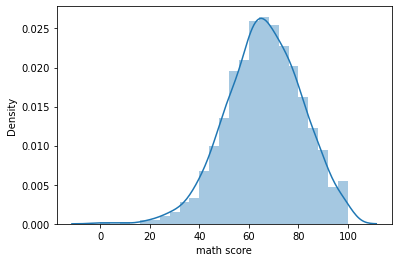

In [37]:
sns.distplot(numerical_data['math score'])

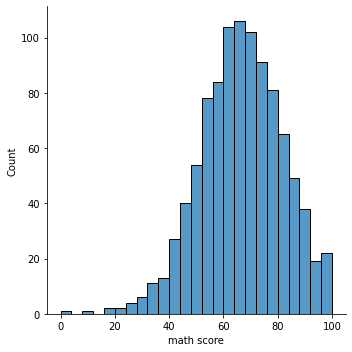

In [38]:
sns.displot(numerical_data['math score'])

**Conclusion:**
* Less Normally Distributed

### Outliers

##### Graphical Methods

**Box Plot**

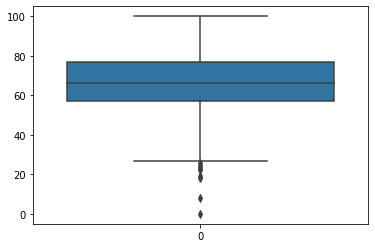

In [39]:
sns.boxplot(data = data['math score'])

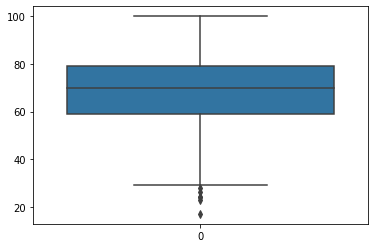

In [40]:
sns.boxplot(data = data['reading score'])

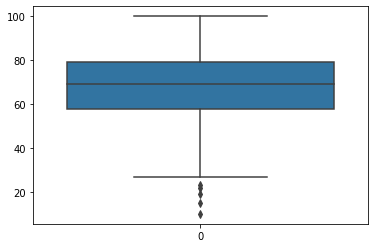

In [41]:
sns.boxplot(data = data['writing score'])

**Distplot**

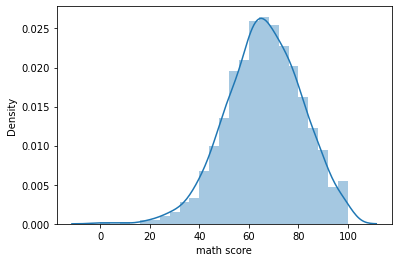

In [42]:
sns.distplot(data['math score'])

**Conclusion:**
* Left Skewed Data

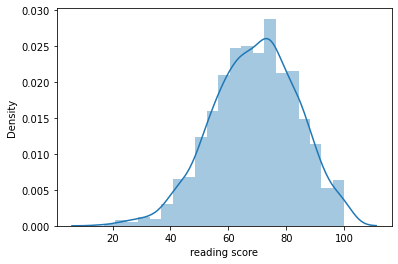

In [43]:
sns.distplot(data['reading score'])

**Conclusion:**
* Left Skewed Data

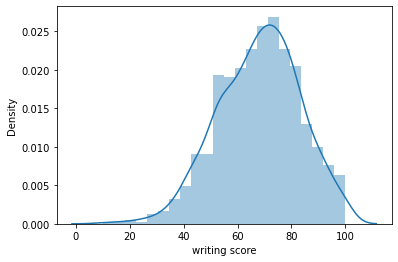

In [44]:
sns.distplot(data['writing score'])

**Conclusion:**
* Left Skewed Data

##### Quantile Methods

**10th percentile**

In [45]:
q1 = data['math score'].quantile(0.25)

**90th percentile**

In [46]:
q3 = data['math score'].quantile(0.75)

**100th percentile**

In [47]:
data['math score'].quantile(1.00)

100.0

**Minimum value in column "math score"**

In [48]:
data['math score'].min()

0

**Maximum value in column "math score"**

In [49]:
data['math score'].max()

100

In [50]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

**IQR : Inter-Quartile Range**

In [51]:
IQR = q3 - q1
IQR

20.0

**Upper Limit**

In [52]:
upper_limit = q3 + 1.5 * IQR
upper_limit

107.0

**Lower Limit**

In [53]:
lower_limit = q1 - 1.5 * IQR
lower_limit

27.0

In [54]:
data[data['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [55]:
data.drop(data[data['math score'] < lower_limit].index, inplace = True)
data.reset_index(inplace = True)

In [56]:
data.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [57]:
data[data['math score'] > upper_limit]

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score


**Creating function determine lower limit, upper limit and IQR**

In [58]:
def IQR(df, column_name, q1, q3):
  q1 = df[column_name].quantile(q1)
  q3 = df[column_name].quantile(q3)
  IQR = q3 - q1
  lower_range = q1 - 1.5 * IQR
  upper_range = q3 + 1.5 * IQR
  return lower_range, IQR, upper_range

In [59]:
IQR(data, 'math score', 0.25, 0.75)

(27.0, 20.0, 107.0)

In [60]:
lr = []
iqr = []
ur  = []
for variable in numerical_data.columns:
  lr.append(IQR(numerical_data, variable, 0.25, 0.75)[0])
  iqr.append(IQR(numerical_data, variable, 0.25, 0.75)[1])
  ur.append(IQR(numerical_data, variable, 0.25, 0.75)[2])

In [61]:
# def replace_with_threshold(data, numeric_column):
#   for variable in numeric_column:
#   lr.append(IQR(numerical_data, variable, 0.25, 0.75)[0])
#   iqr.append(IQR(numerical_data, variable, 0.25, 0.75)[1])
#   ur.append(IQR(numerical_data, variable, 0.25, 0.75)[2])
#   data.loc[data[variable] < lr] = lr
#   data.loc[data[variable] < lr] = ur


### Graphical Analysis

In [62]:
data

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...,...
987,995,female,group E,master's degree,standard,completed,88,99,95,94.000000
988,996,male,group C,high school,free/reduced,none,62,55,55,57.333333
989,997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
990,998,female,group D,some college,standard,completed,68,78,77,74.333333


**Countplot**

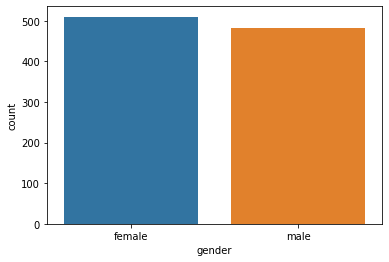

In [63]:
sns.countplot(data['gender'])

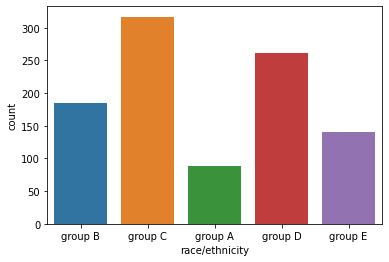

In [64]:
sns.countplot(data['race/ethnicity'])

**Barplot**

In [65]:
df = data.groupby('gender').mean()

In [66]:
df['Average Score']

gender
female    70.249020
male      65.837483
Name: Average Score, dtype: float64

In [67]:
df['Average Score'][0]

70.24901960784314

In [68]:
df['Average Score'][1]

65.8374827109267

In [69]:
df['math score']

gender
female    64.356863
male      68.728216
Name: math score, dtype: float64

In [70]:
df['math score'][0]

64.35686274509804

In [71]:
df['math score'][1]

68.72821576763485

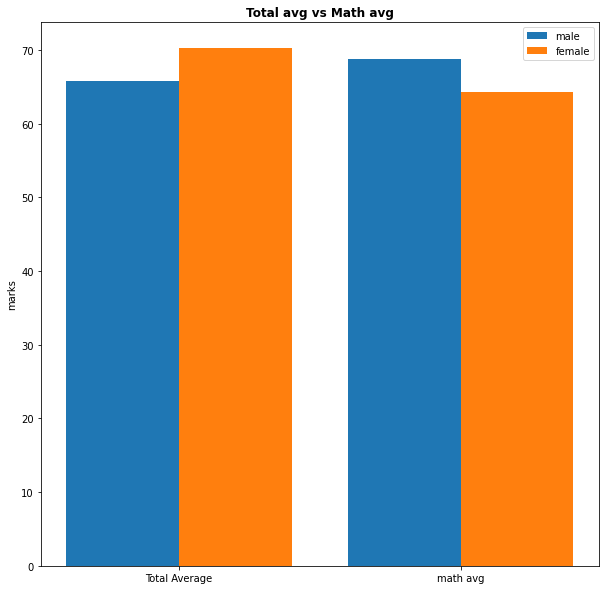

(70.24901960784314, 64.35686274509804)

In [72]:
plt.figure(figsize= (10, 10))
X = ['Total Average', 'math avg']
female_score = df['Average Score'][0],df['math score'][0]
male_score = df['Average Score'][1],df['math score'][1]
X_axis =  np.arange(len(X))
plt.bar(X_axis - 0.2, male_score, 0.4, label = 'male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'female')

plt.xticks(X_axis, X)
plt.ylabel("marks")
plt.title("Total avg vs Math avg", fontweight = 'bold')
plt.legend()
plt.show()
female_score

**Heatmap**

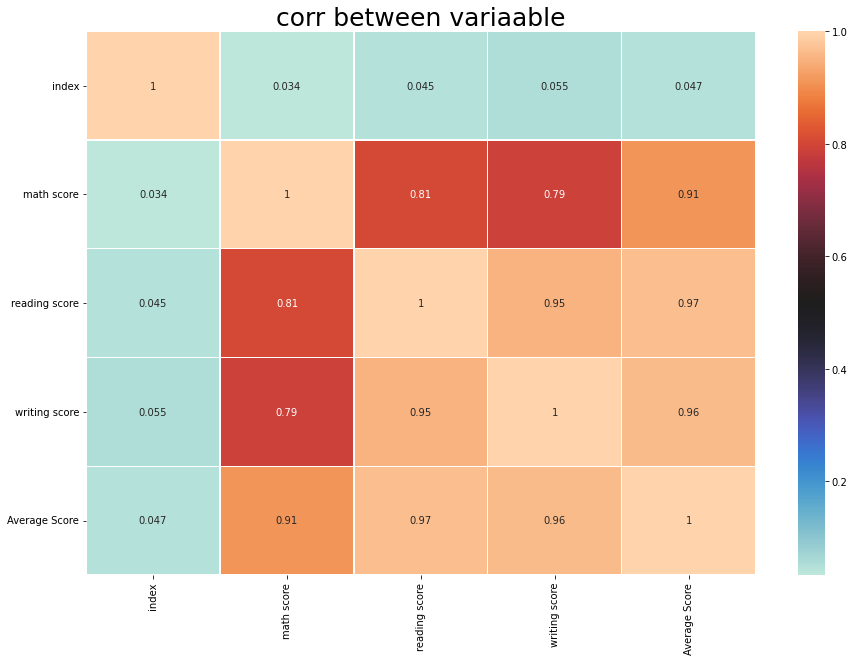

In [73]:
sns.heatmap(data.corr(), annot = True, cmap='icefire', linewidths = 0.3)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("corr between variaable", color = "black", size = 25)
plt.show()

**Pairplot**

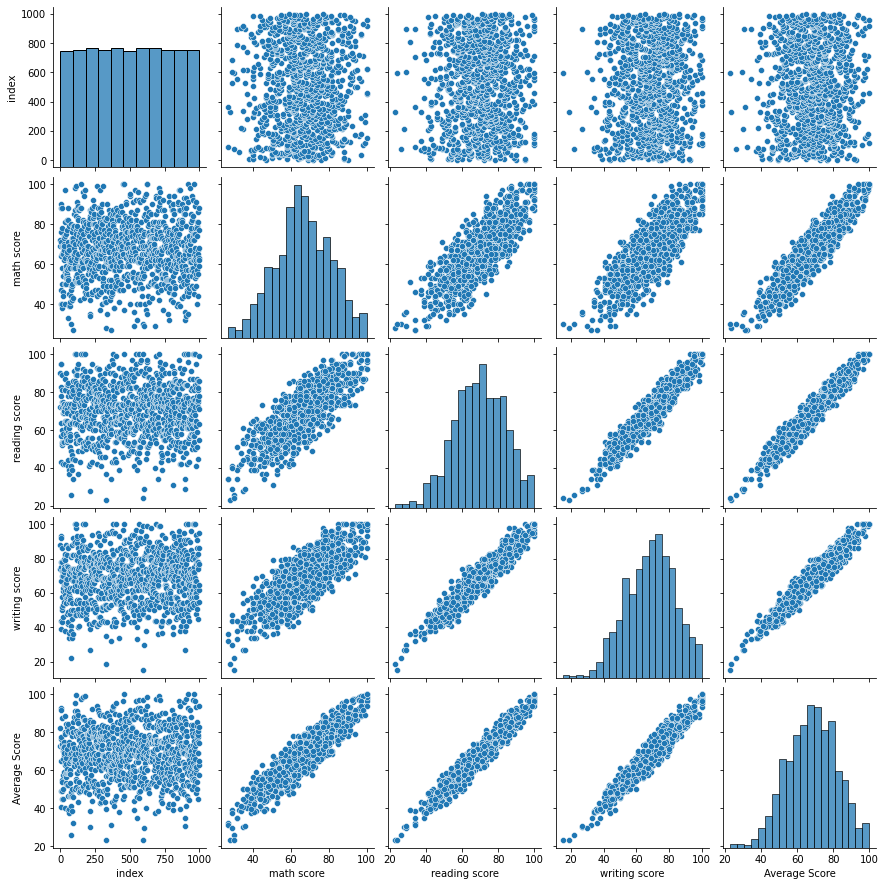

In [74]:
sns.pairplot(data)

**ViolinpLot**
* It shows the data distribution

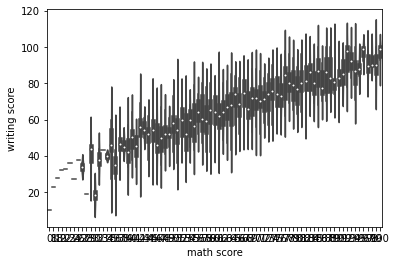

In [75]:
sns.violinplot(data = numerical_data, x = numerical_data['math score'], y = numerical_data['writing score'])

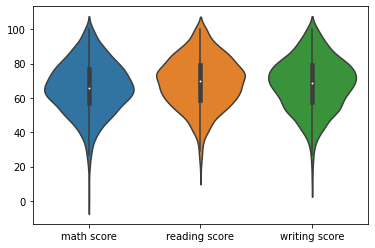

In [76]:
sns.violinplot(data = numerical_data)

### PDF Conversion Code

In [77]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/EDA_Student_Data.ipynb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mi